#  SUYASH PRATAP SINGH


# Registration ID: GO_STP_6412

# TASK:- Prediction using Supervised Machine Learning using Simple Linear Regression

In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables. 

# Import The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Reading The CSV file

In [2]:
kp = pd.read_csv(r'C:\Users\Admin\Downloads\StudentHoursScores.csv')

In [52]:
kp

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12
5,8.9,87
6,2.5,21
7,1.9,19
8,2.7,29
9,8.3,81


In [4]:
#print first five row
kp.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


In [5]:
#print random six row
kp.sample(6)

,Hours,Scores
5,8.9,87
6,2.5,21
10,5.5,58
4,1.1,12
13,3.5,34
11,9.2,88


# Checking how many null values are there in dataset

In [3]:
kp.isna().sum()

Hours     0
Scores    0
dtype: int64

# Shape of dataset

In [6]:
kp.shape

(23, 2)

# Descriptive analysis of the dataset using describe function¶

In [7]:
kp.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


# basic information about the dataset

In [8]:
kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


# Plotting a scatter plot showing relationship between No of Hours vs scores

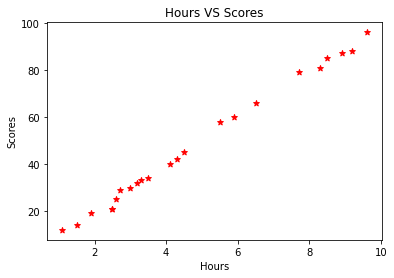

In [11]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.scatter(kp.Hours,kp.Scores,color='red',marker='*')
plt.show()

# Conclusion:-
This "SCATTER PLOT" indicates positive linear relationship as much as hours You study is a chance of high scoring.

# Two variables for the regression

In [15]:
X=np.array(kp.Hours)
Y=np.array(kp.Scores)

# Reshaping the numpy array for vertical output

In [16]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

# Preparing Data and splitting into train and test sets.

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

# -> We have Splitted Our Data Using 80:20 RULE(PARETO) 

In [18]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (18, 1)
Y train.shape = (18, 1)
X test.shape  = (5, 1)
Y test.shape  = (5, 1)


# Training the Model

In [19]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [20]:
##Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [21]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = [-0.80159397] 
B1 = [[10.06743716]]


In [22]:
##plotting the REGRESSION LINE---
Y0 = linreg.intercept_ + linreg.coef_*X_train

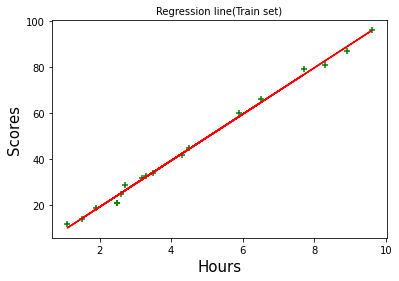

In [24]:
##plotting on train data
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

# Testing Data.

In [25]:
Y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[[91.81882791]
 [54.56931042]
 [29.40071751]
 [84.7716219 ]
 [40.47489839]]


In [26]:
#now print the Y_test.
Y_test

array([[88],
       [58],
       [30],
       [85],
       [40]], dtype=int64)

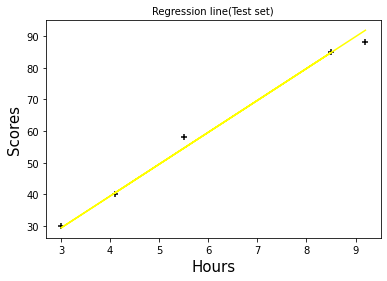

In [28]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='yellow')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

# Comparing Actual vs Predicted Scores

In [29]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_comp = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_comp

,Actual,Result
0,[88],[91.81882791035625]
1,[58],[54.56931041529484]
2,[30],[29.40071751322631]
3,[85],[84.77162189777707]
4,[40],[40.47489839013646]


# ACCURACY OF THE MODEL

In [30]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)##Goodness of fit Test

0.9900509060111312

# Predicting the Error

In [31]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  5.397980434600632
Root Mean Squared Error =  2.323355425801363
Mean Absolute Error     =  2.323355425801363


# Predicting the score

In [51]:
hours = [[7.7],[5.9],[4.5],[8.9],[8.3],[5.5],[9.2],[1.5],[3.5],[8.5],[9.6]]
own_pred = linreg.predict(hours)
own_pred

array([[76.71767217],
       [58.59628528],
       [44.50187325],
       [88.79859676],
       [82.75813447],
       [54.56931042],
       [91.81882791],
       [14.29956177],
       [34.43443609],
       [84.7716219 ],
       [95.84580277]])

In [54]:
Prediction_score = linreg.predict([[8.9]])
print("predicted score for a student studying 8.9 hours :",Prediction_score)

predicted score for a student studying 8.9 hours : [[88.79859676]]


# Conclusion:
From the above result we can say that if a studied for 8.9 then student will secured 88.79 MARKS.

In [53]:
Prediction_score = linreg.predict([[9.6]])
print("predicted score for a student studying 9.6 hours :",Prediction_score)

predicted score for a student studying 9.6 hours : [[95.84580277]]


# CONCLUSION:
From the above result we can say that if a studied for 9.6 then student will secured 95.84 MARKS.

# THANK YOU